# Análise Explorátoria - Classificação de Filmes TMDb

Este projeto consiste em analisar as bases de dados de classificação de filmes da IMBb e TMBd com a linguagem de programação Python e suas principais bibliotecas para análise de dados.
Todos os dados utilizados no projeto podem ser encontrados [aqui](https://github.com/rafaelladuarte/film_rating_exploratory_analysis/tree/main/Dados).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import json

Agora vamos tratar e analisar conhecida a classificação de filmes da TMBd, também conhecida como The Movie Database, é uma base de dados grátis e de código aberto, sobre filmes e seriados, criado por Travis Bell em 2008. Atualizado constantemente através do apoio da comunidade. Inicialmente, era apenas uma base de dados sobre filmes, mas em 2013 foi adicionada a seção de séries.

## TMBd

### Tratamento

In [3]:
path_tmbd = "https://raw.githubusercontent.com/rafaelladuarte/film_rating_exploratory_analysis/main/Dados/tmdb_5000_movies.csv"

In [4]:
df_tmbd= pd.read_csv(path_tmbd)
df_tmbd.sample(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2918,11000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,12094,"[{""id"": 2820, ""name"": ""wound""}, {""id"": 3444, ""...",en,Jackass Number Two,Jackass Number Two is a compilation of various...,11.227087,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-09-22,72778712,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Guess who just made number two?,Jackass Number Two,6.4,298
3793,4000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,133575,[],en,The Velocity of Gary,Gary is in love with Valentino. So is Mary Car...,0.409089,"[{""name"": ""Ventanarosa Productions"", ""id"": 689...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-07-16,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,*(Not His Real Name),The Velocity of Gary,4.2,5
123,150000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,605,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,The Matrix Revolutions,The human city of Zion defends itself against ...,73.313918,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-05,424988211,129.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Everything that has a beginning has an end.,The Matrix Revolutions,6.4,3096


In [5]:
df_tmbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
df_tmbd.drop(
    columns=[
        "homepage",
        "id",
        "keywords",
        "original_title",
        "overview",
        "spoken_languages",
        "tagline",
    ],
    inplace=True
)
df_tmbd

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",es,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,Released,El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",en,0.642552,[],[],2011-12-26,0,85.0,Released,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,Released,"Signed, Sealed, Delivered",7.0,6
4801,0,[],en,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,Released,Shanghai Calling,5.7,7


In [7]:
df_tmbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   popularity            4803 non-null   float64
 4   production_companies  4803 non-null   object 
 5   production_countries  4803 non-null   object 
 6   release_date          4802 non-null   object 
 7   revenue               4803 non-null   int64  
 8   runtime               4801 non-null   float64
 9   status                4803 non-null   object 
 10  title                 4803 non-null   object 
 11  vote_average          4803 non-null   float64
 12  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 487.9+ KB


In [8]:
df_tmbd.dropna()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",es,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,Released,El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",en,0.642552,[],[],2011-12-26,0,85.0,Released,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,Released,"Signed, Sealed, Delivered",7.0,6
4801,0,[],en,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,Released,Shanghai Calling,5.7,7


In [9]:
df_tmbd["genres"][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [10]:
json.loads(df_tmbd["genres"][0])[0]["name"]

'Action'

In [11]:
df_tmbd["production_companies"][0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [12]:
json.loads(df_tmbd["production_companies"][0])[0]["name"]

'Ingenious Film Partners'

In [13]:
df_tmbd["production_countries"][0]

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

In [14]:
json.loads(df_tmbd["production_countries"][0])[0]["name"]

'United States of America'

In [15]:
def get_main_column(string):
    if (string != None) and (string != '[]'):
        tupla = json.loads(string)
        if len(tupla) > 0:
            atributo = tupla[0]["name"]
            return atributo
    else:
        return None

In [16]:
get_main_column(df_tmbd["genres"][0])

'Action'

In [17]:
get_main_column(df_tmbd["production_companies"][0])

'Ingenious Film Partners'

In [18]:
get_main_column(df_tmbd["production_countries"][0])

'United States of America'

In [19]:
df_tmbd["main_genre"] = df_tmbd["genres"].apply(lambda x: get_main_column(x))
df_tmbd["main_genre"]

0            Action
1         Adventure
2            Action
3            Action
4            Action
           ...     
4798         Action
4799         Comedy
4800         Comedy
4801           None
4802    Documentary
Name: main_genre, Length: 4803, dtype: object

In [20]:
df_tmbd["main_company"] = df_tmbd["production_companies"].apply(lambda x: get_main_column(x))
df_tmbd["main_company"]

0        Ingenious Film Partners
1           Walt Disney Pictures
2              Columbia Pictures
3             Legendary Pictures
4           Walt Disney Pictures
                  ...           
4798           Columbia Pictures
4799                        None
4800       Front Street Pictures
4801                        None
4802    rusty bear entertainment
Name: main_company, Length: 4803, dtype: object

In [21]:
df_tmbd["main_country"] = df_tmbd["production_countries"].apply(lambda x: get_main_column(x))
df_tmbd["main_country"]

0       United States of America
1       United States of America
2                 United Kingdom
3       United States of America
4       United States of America
                  ...           
4798                      Mexico
4799                        None
4800    United States of America
4801    United States of America
4802    United States of America
Name: main_country, Length: 4803, dtype: object

In [22]:
df_tmbd.sample(3)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,main_genre,main_company,main_country
1871,25000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 35, ""...",en,27.683874,"[{""name"": ""Tiger Aspect Productions"", ""id"": 68...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2007-03-22,229736344,90.0,Released,Mr. Bean's Holiday,6.1,663,Family,Tiger Aspect Productions,United Kingdom
3704,4500000,"[{""id"": 18, ""name"": ""Drama""}]",en,3.819796,"[{""name"": ""Hemdale Film"", ""id"": 3952}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1986-04-23,0,123.0,Released,Salvador,7.0,71,Drama,Hemdale Film,United Kingdom
1805,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 80, ""nam...",en,9.317265,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2001-08-05,0,103.0,Released,The Curse of the Jade Scorpion,6.5,165,Comedy,DreamWorks SKG,Germany


In [23]:
df_tmbd["year"] = df_tmbd["release_date"].str.split(pat="-",expand = True)[0]

In [24]:
df_tmbd

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,main_genre,main_company,main_country,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,Action,Ingenious Film Partners,United States of America,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,Adventure,Walt Disney Pictures,United States of America,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,Action,Columbia Pictures,United Kingdom,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106,Action,Legendary Pictures,United States of America,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,John Carter,6.1,2124,Action,Walt Disney Pictures,United States of America,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",es,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,Released,El Mariachi,6.6,238,Action,Columbia Pictures,Mexico,1992
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",en,0.642552,[],[],2011-12-26,0,85.0,Released,Newlyweds,5.9,5,Comedy,None,None,2011
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,Released,"Signed, Sealed, Delivered",7.0,6,Comedy,Front Street Pictures,United States of America,2013
4801,0,[],en,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,Released,Shanghai Calling,5.7,7,None,None,United States of America,2012


In [25]:
df_tmbd[
    [
        "budget","original_language","popularity",
        "revenue","runtime","status",
        "title","vote_average","vote_count",
        "main_genre","main_company","main_country"
    ]
].to_csv("Dados/tmbd_dataset_dashboard.csv")

### Análise

Algumas perguntas a se pensar:

* Filmes por gênero 
* Filmes por estudio de cinema 
* Filmes por pais 
* Filmes por linguagem original 
* Filmes por status 
* Filmes por ano/decada de lançamento 
* Files por preços

In [26]:
df_tmbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   popularity            4803 non-null   float64
 4   production_companies  4803 non-null   object 
 5   production_countries  4803 non-null   object 
 6   release_date          4802 non-null   object 
 7   revenue               4803 non-null   int64  
 8   runtime               4801 non-null   float64
 9   status                4803 non-null   object 
 10  title                 4803 non-null   object 
 11  vote_average          4803 non-null   float64
 12  vote_count            4803 non-null   int64  
 13  main_genre            4775 non-null   object 
 14  main_company          4452 non-null   object 
 15  main_country         

In [27]:
df_tmbd.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


#### Genero

In [28]:
df_genre = df_tmbd["main_genre"].value_counts().to_frame().reset_index()
df_genre.rename(columns={"index":"main_genre","main_genre":"count"},inplace=True)
df_genre

,main_genre,count
0,Drama,1207
1,Comedy,1042
2,Action,754
3,Adventure,339
4,Horror,300
5,Crime,195
6,Thriller,194
7,Animation,123
8,Fantasy,117
9,Romance,106


In [29]:
total = df_genre["count"].sum()
total

4775

In [30]:
df_genre["main_genre"].value_counts().sum()

20

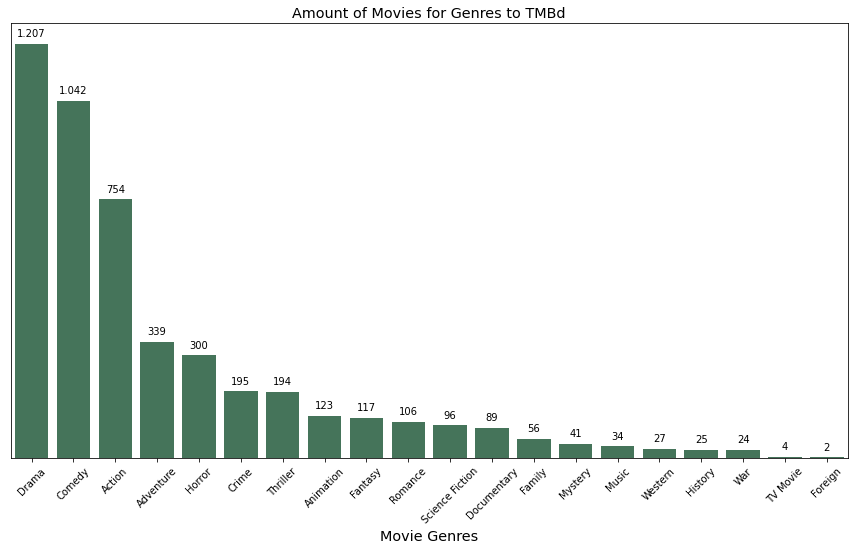

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(
    x=df_genre["main_genre"], 
    y=df_genre["count"], 
    data=df_genre,
    color="seagreen",
    saturation=.5,
)
plt.xticks(rotation=45)
ax.get_yaxis().set_visible(False)
ax.set_title("Amount of Movies for Genres to TMBd",fontsize= 'x-large')
ax.set_xlabel('Movie Genres',fontsize= 'x-large')
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 22,
          '{:,}'.format(
              int(retangulo.get_height())).replace(',','.'),
              ha = 'center',
              fontsize='medium'
         )
fig.savefig('images/tmbd_amount_movies_genres.jpg')

#### Company

In [32]:
df_tmbd["main_company"].value_counts().to_frame().reset_index()

,index,main_company
0,Paramount Pictures,281
1,Universal Pictures,260
2,Columbia Pictures,200
3,Twentieth Century Fox Film Corporation,177
4,New Line Cinema,157
...,...,...
1308,Australian Film Finance Corporation (AFFC),1
1309,Stanley Kubrick Productions,1
1310,Palpable Productions,1
1311,Nelson Entertainment,1


In [33]:
df_company = df_tmbd["main_company"].value_counts().to_frame().reset_index()
df_company.rename(columns={"index":"main_company","main_company":"count"},inplace=True)
df_company

,main_company,count
0,Paramount Pictures,281
1,Universal Pictures,260
2,Columbia Pictures,200
3,Twentieth Century Fox Film Corporation,177
4,New Line Cinema,157
...,...,...
1308,Australian Film Finance Corporation (AFFC),1
1309,Stanley Kubrick Productions,1
1310,Palpable Productions,1
1311,Nelson Entertainment,1


In [34]:
total = df_company["count"].sum()
total

4452

In [35]:
df_company["main_company"].value_counts().sum()

1313

In [36]:
top_company = df_company.head(10)
tail_company = df_company.tail(10)

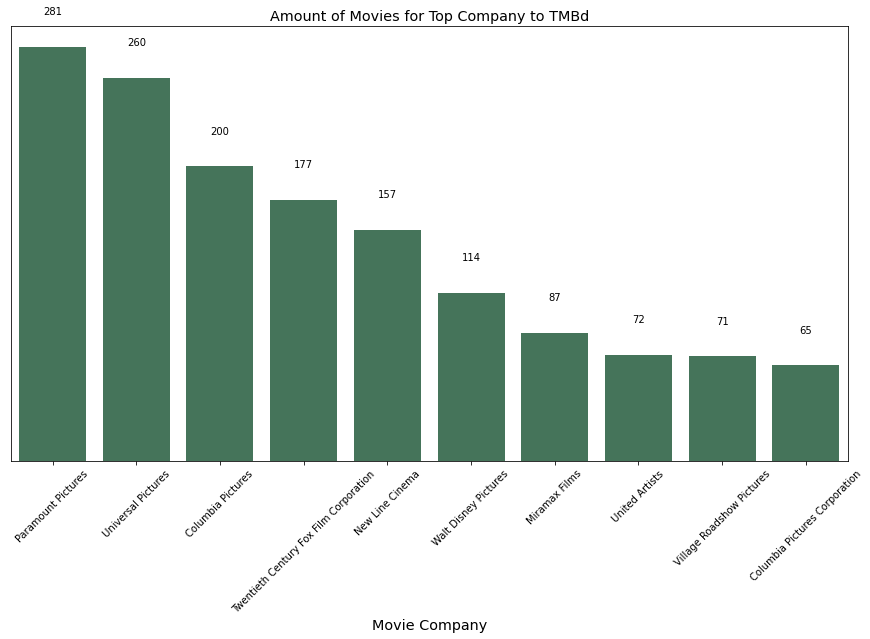

In [37]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(
    x=top_company["main_company"], 
    y=top_company["count"], 
    data=top_company,
    color="seagreen",
    saturation=.5,
)
plt.xticks(rotation=45)
ax.get_yaxis().set_visible(False)
ax.set_title("Amount of Movies for Top Company to TMBd",fontsize= 'x-large')
ax.set_xlabel('Movie Company',fontsize= 'x-large')
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 22,
          '{:,}'.format(
              int(retangulo.get_height())).replace(',','.'),
              ha = 'center',
              fontsize='medium'
         )
fig.savefig('images/tmbd_amount_movies_top_company.jpg')

In [38]:
tail_company 

,main_company,count
1303,Cannon Pictures,1
1304,Wildgaze Films,1
1305,Gospel of John Ltd.,1
1306,FilmEngine,1
1307,Euro International Film (EIA),1
1308,Australian Film Finance Corporation (AFFC),1
1309,Stanley Kubrick Productions,1
1310,Palpable Productions,1
1311,Nelson Entertainment,1
1312,rusty bear entertainment,1


#### Country

In [39]:
df_tmbd["main_country"].value_counts().to_frame().reset_index()

,index,main_country
0,United States of America,3102
1,United Kingdom,374
2,Canada,220
3,Germany,200
4,France,174
...,...,...
65,Peru,1
66,Bosnia and Herzegovina,1
67,Panama,1
68,Singapore,1


In [40]:
df_country = df_tmbd["main_country"].value_counts().to_frame().reset_index()
df_country.rename(columns={"index":"main_country","main_country":"count"},inplace=True)
df_country

,main_country,count
0,United States of America,3102
1,United Kingdom,374
2,Canada,220
3,Germany,200
4,France,174
...,...,...
65,Peru,1
66,Bosnia and Herzegovina,1
67,Panama,1
68,Singapore,1


In [41]:
total_country = df_tmbd["main_country"].value_counts()
total_country_count = df_country['count'].sum()
total_usa = total_country.loc["United States of America"]
total_others = total_country_count - total_usa
print(total_usa, total_others)

3102 1527


In [42]:
simple_country = {
    'country' : ['United States of America','Others'],
    'count' : [total_usa, total_others]
}
df_simple_country = pd.DataFrame(simple_country)

In [43]:
df_simple_country

,country,count
0,United States of America,3102
1,Others,1527


In [44]:
df_simple_country['percent']= (df_simple_country["count"]/total_country_count)*100
df_simple_country = df_simple_country.round(2)
df_simple_country

,country,count,percent
0,United States of America,3102,67.01
1,Others,1527,32.99


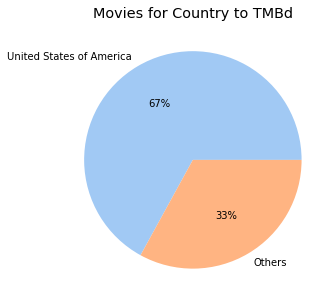

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.pie(
    df_simple_country['percent'], 
    labels = df_simple_country['country'], 
    colors = sns.color_palette('pastel')[0:5], 
    autopct='%.0f%%'
)
plt.title("Movies for Country to TMBd",fontsize= 'x-large')
fig.savefig('images/tmdb_amount_movies_country.jpg')

#### Language

In [46]:
df_tmbd["original_language"].value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [47]:
df_language = df_tmbd["original_language"].value_counts().to_frame().reset_index()
df_language.rename(columns={"index":"language","original_language":"count"},inplace=True)
df_language.head()

,language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


In [48]:
total_language = df_tmbd["original_language"].value_counts()
total_language_count = df_language['count'].sum()
total_en = total_language .loc["en"]
total_others = total_language_count - total_en
print(total_en, total_others)

4505 298


In [49]:
simple_language = {
    'language' : ['English','Others'],
    'count' : [total_en, total_others]
}
df_simple_language = pd.DataFrame(simple_language)

In [50]:
df_simple_language['percent']= (df_simple_language["count"]/total_language_count)*100
df_simple_language = df_simple_language.round(2)
df_simple_language

,language,count,percent
0,English,4505,93.8
1,Others,298,6.2


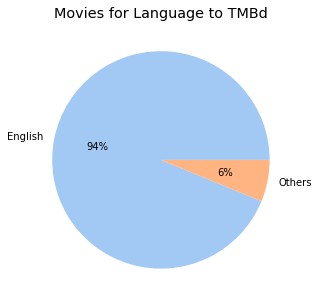

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.pie(
    df_simple_language['percent'], 
    labels = df_simple_language['language'], 
    colors = sns.color_palette('pastel')[0:5], 
    autopct='%.0f%%'
)
plt.title("Movies for Language to TMBd",fontsize= 'x-large')
fig.savefig('images/tmdb_amount_movies_country.jpg')

#### Status

In [52]:
df_tmbd["status"].value_counts().to_frame().reset_index()

,index,status
0,Released,4795
1,Rumored,5
2,Post Production,3


In [53]:
df_tmbd.loc[(df_tmbd['status'])=='Rumored'][['title','main_genre']]

,title,main_genre
4401,The Helix... Loaded,Action
4453,Crying with Laughter,Comedy
4508,The Harvest (La Cosecha),Documentary
4662,Little Big Top,Comedy
4754,The Naked Ape,Drama


In [54]:
df_tmbd.loc[(df_tmbd['status'])=='Post Production'][['title','main_genre']]

,title,main_genre
2906,Dancin' It's On,Drama
4169,Brotherly Love,Drama
4178,Higher Ground,Drama


#### Year

In [55]:
year = df_tmbd["year"].dropna()

In [56]:
decada = year.str.split(pat="",expand = True)
decada[4] = '0'
decada["decada"] = decada[1] + decada[2] + decada[3] + decada[4]

In [57]:
df_tmbd_year = pd.merge(year, decada["decada"], right_index= True, left_index= True)
df_tmbd_year

,year,decada
0,2009,2000
1,2007,2000
2,2015,2010
3,2012,2010
4,2012,2010
...,...,...
4798,1992,1990
4799,2011,2010
4800,2013,2010
4801,2012,2010


In [58]:
df_tmbd_year = df_tmbd_year.astype(str).astype(int)
df_tmbd_year = df_tmbd_year[df_tmbd_year["year"] > 1970]
df_tmbd_year = df_tmbd_year[df_tmbd_year["year"] < 2018]
df_tmbd_year

,year,decada
0,2009,2000
1,2007,2000
2,2015,2010
3,2012,2010
4,2012,2010
...,...,...
4798,1992,1990
4799,2011,2010
4800,2013,2010
4801,2012,2010


In [59]:
df_tmbd_year["year"].value_counts().to_frame().reset_index()

,index,year
0,2009,247
1,2014,238
2,2006,237
3,2013,231
4,2008,227
5,2010,225
6,2011,223
7,2005,217
8,2015,216
9,2012,208


In [60]:
df_tmbd_decada = df_tmbd_year["decada"].value_counts().to_frame().reset_index()
df_tmbd_decada = df_tmbd_decada.rename(columns={"index":"decada","decada":"count"})
df_tmbd_decada

,decada,count
0,2000,2048
1,2010,1446
2,1990,778
3,1980,278
4,1970,97


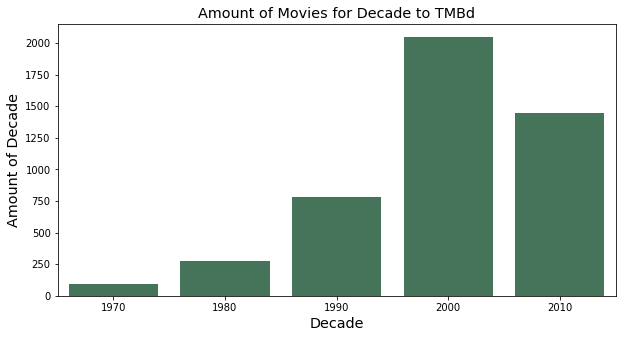

In [61]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(
    x=df_tmbd_decada["decada"], 
    y=df_tmbd_decada["count"], 
    data=df_tmbd_decada,
    color="seagreen",
    saturation=.5,
)
ax.set_title("Amount of Movies for Decade to TMBd",fontsize= 'x-large')
ax.set_xlabel('Decade',fontsize= 'x-large')
ax.set_ylabel('Amount of Decade',fontsize= 'x-large');
fig.savefig('images/tmbd_amount_movies_decade.jpg')

#### Budget

In [62]:
df_tmbd.sort_values(by='budget',ascending=False).head()[['title','main_genre','main_company','budget','year']]

,title,main_genre,main_company,budget,year
17,Pirates of the Caribbean: On Stranger Tides,Adventure,Walt Disney Pictures,380000000,2011
1,Pirates of the Caribbean: At World's End,Adventure,Walt Disney Pictures,300000000,2007
7,Avengers: Age of Ultron,Action,Marvel Studios,280000000,2015
10,Superman Returns,Adventure,DC Comics,270000000,2006
4,John Carter,Action,Walt Disney Pictures,260000000,2012
